# Spaxel assignment

This notebook shows the principle, how stellar particles or gas particles are assigned to the different spaxels. We show this here for squared spaxels.

We start with two particles and assign them to the spatial matching spaxels.

coords [[0.5 1.5]
 [2.5 3.5]]


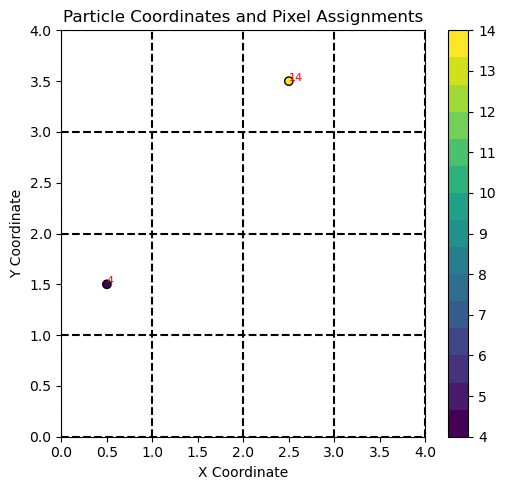

In [1]:
# NBVAL_SKIP
from rubix.telescope.utils import square_spaxel_assignment
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from jaxtyping import Float, Array 
import jax.numpy as jnp
import numpy as np

# Define the particle coordinates
coords = jnp.array([[0.5, 1.5], [2.5, 3.5]])
print("coords", coords)

# Define the spatial bin edges
spatial_bin_edges = jnp.array([0.0, 1.0, 2.0, 3.0, 4.0])

# Compute the pixel assignments
pixel_assignments = square_spaxel_assignment(coords, spatial_bin_edges)

# Create a discrete colormap
max_assignment = np.max(pixel_assignments)
colors = plt.cm.viridis(np.linspace(0, 1, int(max_assignment) + 1))
cmap = ListedColormap(colors)

# Plot the results
plt.figure(figsize=(10, 5))

# Plotting the particles with labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=pixel_assignments, cmap=cmap, edgecolor='k')
plt.colorbar(scatter, ticks=np.arange(0, max_assignment + 1))
plt.title('Particle Coordinates and Pixel Assignments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(spatial_bin_edges[0], spatial_bin_edges[-1])
plt.ylim(spatial_bin_edges[0], spatial_bin_edges[-1])


# Label each point with its pixel index
for i, (x, y) in enumerate(coords[:, :2]):
    plt.text(x, y, str(pixel_assignments[i]), color='red', fontsize=8)

#create the bins
for edge in spatial_bin_edges:
    plt.axvline(edge, color='k', linestyle='--')
    plt.axhline(edge, color='k', linestyle='--')

plt.tight_layout()
plt.show()


Now we do the same with a lot more random points.

<Figure size 1000x500 with 0 Axes>

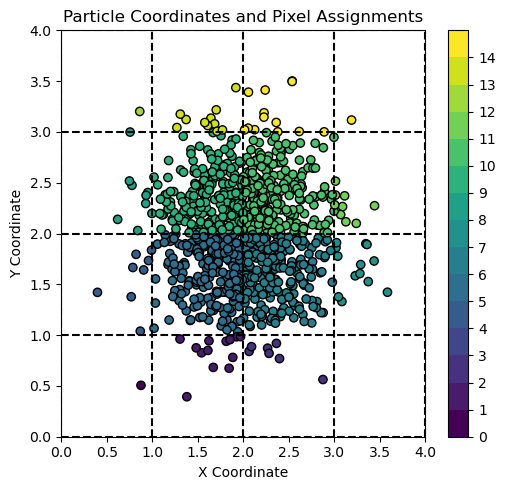

In [2]:
# NBVAL_SKIP
#create random data
n_stars = 1000
coords = np.random.normal(2, 0.5, (n_stars, 3))
coords = jnp.array(coords)

# Compute the pixel assignments
pixel_assignments = square_spaxel_assignment(coords, spatial_bin_edges)

# Plot the results
plt.figure(figsize=(10, 5))


# Plot the results
plt.figure(figsize=(10, 5))

# Plotting the particles with labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=pixel_assignments, cmap=cmap, edgecolor='k')
plt.colorbar(scatter, ticks=np.arange(0, max_assignment + 1))
plt.title('Particle Coordinates and Pixel Assignments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(spatial_bin_edges[0], spatial_bin_edges[-1])
plt.ylim(spatial_bin_edges[0], spatial_bin_edges[-1])


#create the bins
for edge in spatial_bin_edges:
    plt.axvline(edge, color='k', linestyle='--')
    plt.axhline(edge, color='k', linestyle='--')

plt.tight_layout()
plt.show()


And the last plot shows how many particles fall in each spaxel.

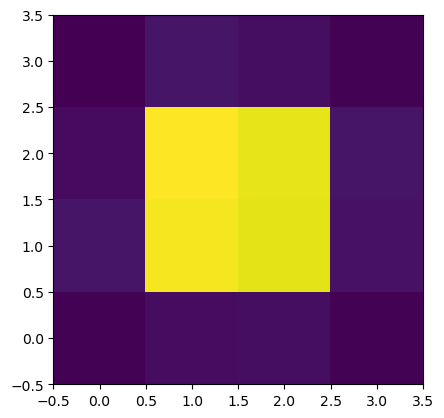

In [3]:
# NBVAL_SKIP
image = np.zeros((len(spatial_bin_edges) - 1, len(spatial_bin_edges) - 1))

# Count the number of particles in each pixel
for i in range(len(spatial_bin_edges) - 1):
    for j in range(len(spatial_bin_edges) - 1):
        image[i, j] = np.sum(pixel_assignments == (i + (len(spatial_bin_edges) - 1) * j))
        
        
plt.imshow(image, cmap='viridis', origin='lower')